# Capstone Project Supervised Learning

<u>Goal:</u> \
Predict whether a customer churns (discontinues the service) given input information about customer use of Telco services.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploring the data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


We have a mix of categorical and continuous data. \
7032 data points, all non-null so no action needed to clear null values.

In [7]:
df.isna().sum() #Confirmation of no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Data seems diverse - 18 minimum TotalCharges and 8684 maximum for instance.
Many of the columns are categorical, thus unable to give numerical data for .describe().

In [9]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## Data visualisation

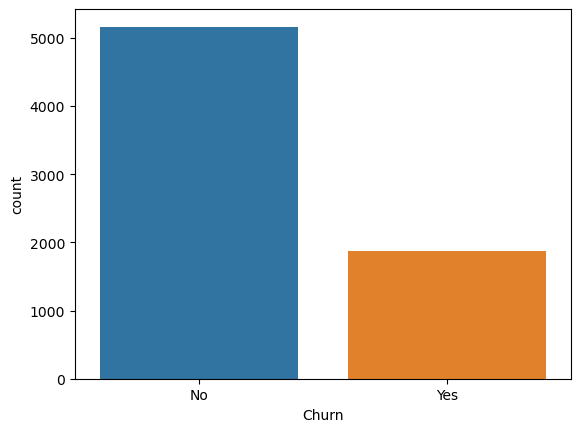

In [10]:
sns.countplot(x=df['Churn']);

We have an unbalanced label - 
this means a model that very often defaults to predicting no could do
quite well accuracy-score wise, make sure to use other metrics as well.

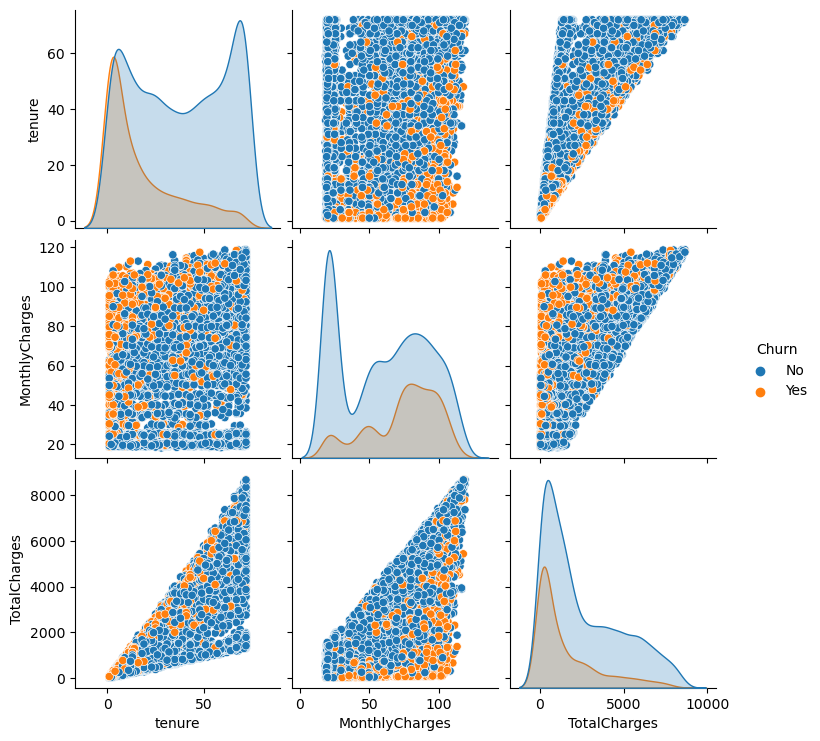

In [11]:
sns.pairplot(data=df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'],hue='Churn')
#Doesn't make sense to pass in categorical or 0/1 values

No clean split on any features.

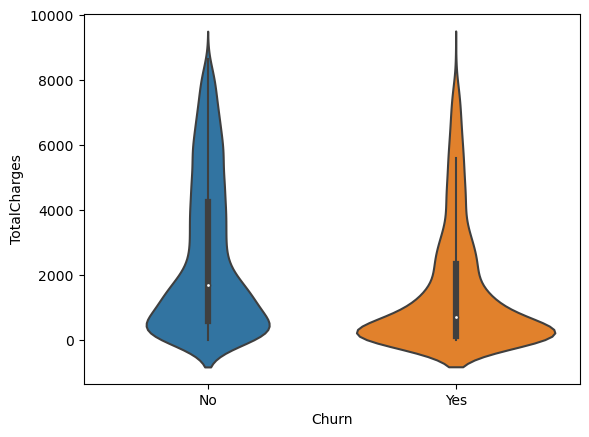

In [12]:
sns.violinplot(data=df, x='Churn', y='TotalCharges');
#the churn rate is higher for customers with lower amount of total charges

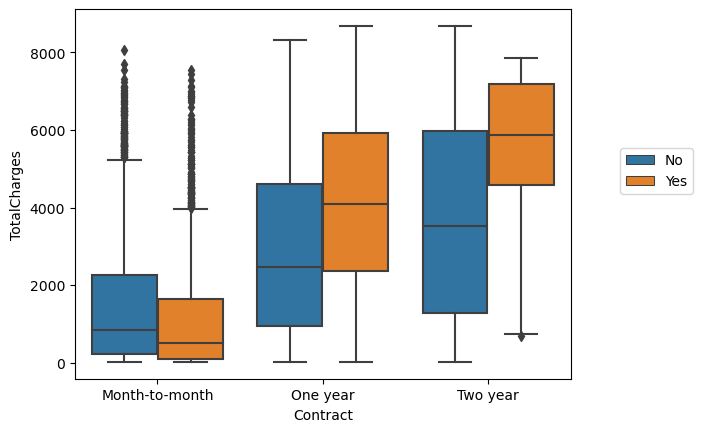

In [13]:
sns.boxplot(data=df,x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1,0.5));

The longer the contract, the less the churn rate is (naturally). \
Interestingly, for both one and two year contracts, if the customer has more total charges, they are more likely to churn.

In [14]:
df_corr = pd.get_dummies(df.drop('customerID', axis=1))
#there are too many unique values for 'customerID' - 
#making dummies is not necessary for this column

In [15]:
correlations = df_corr.drop(['Churn_No'], axis=1).corr()['Churn_Yes'].sort_values()
#It only makes sense to find correlation for one of either Churn_Yes or Churn_No.
#So we drop Churn_No here.

In [16]:
correlations = correlations.drop('Churn_Yes')
#We don't need the correlation of Churn_Yes with itself

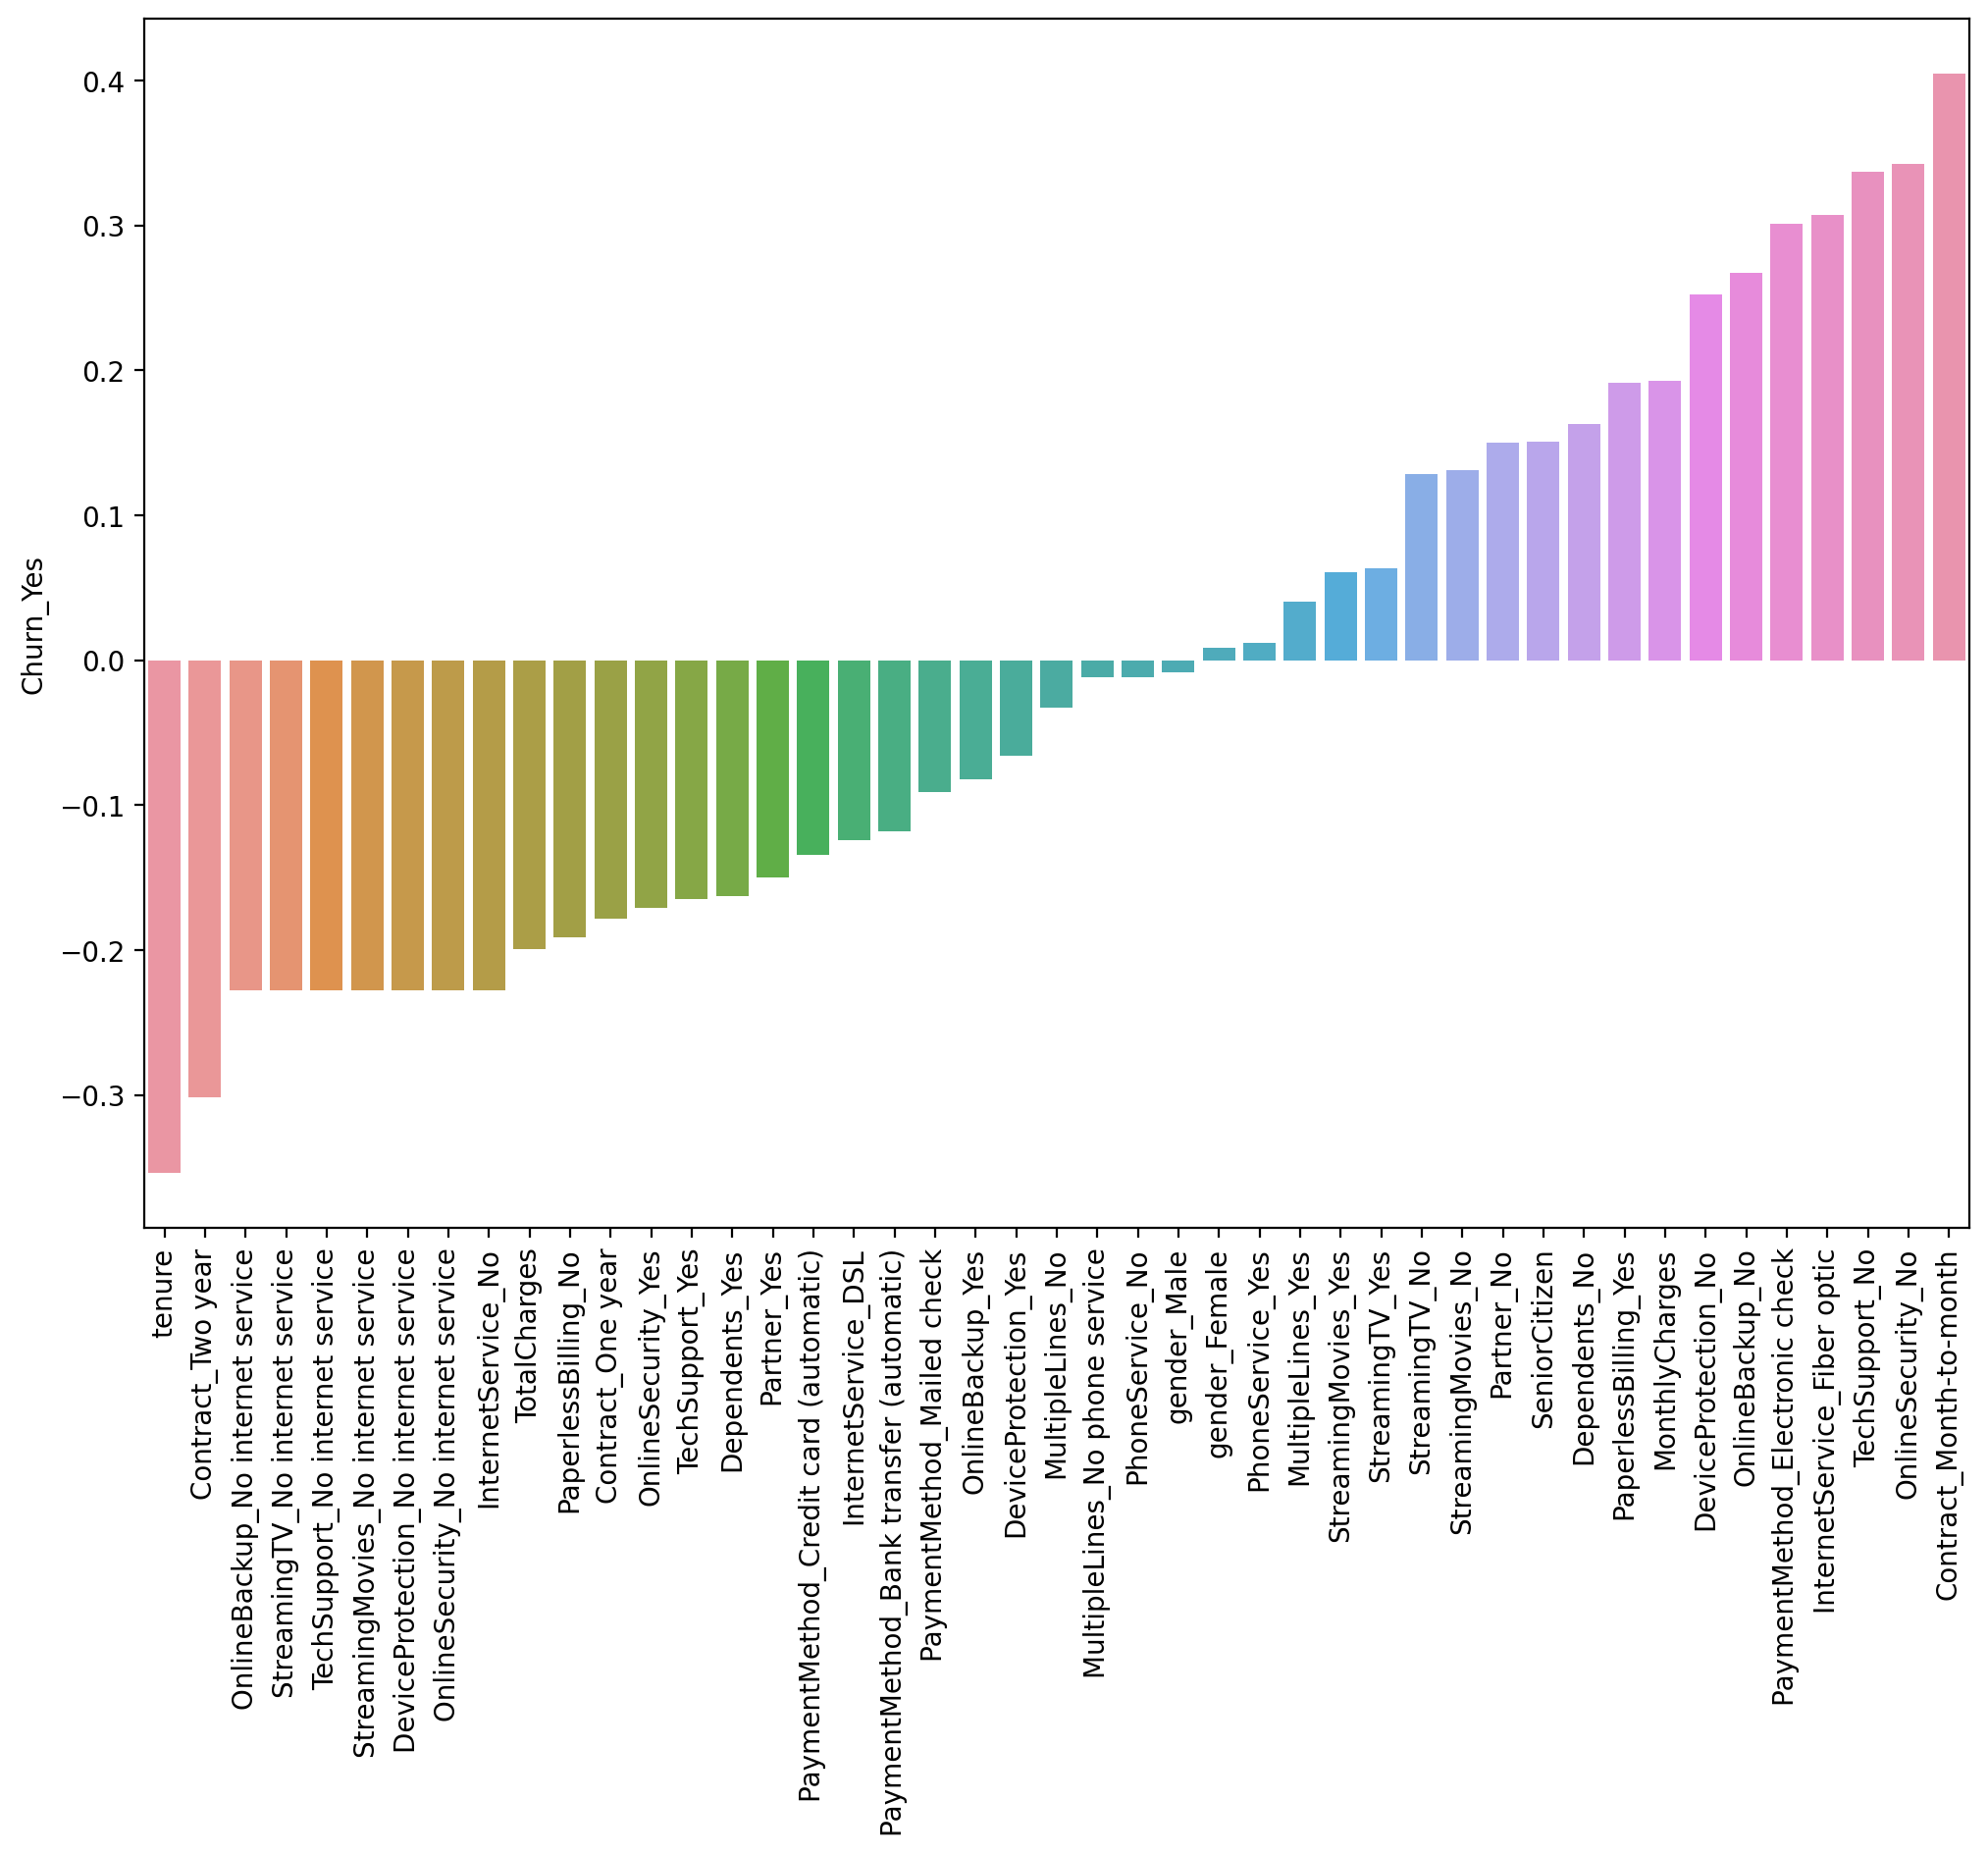

In [17]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=correlations.index, y=correlations)
plt.xticks(rotation=90);

Some notes: High positive correlation with month-to-month - users with this kind of service are more likely to drop out.
Also note that people without additional services (device protection, online backups, tech support, online security) are more likely to churn.

Obviously as already shown, long tenure or long contract are highly negatively correlated with churning. 

Next, let's have a deeper look at the tenure and contract type data.

In [18]:
df['Contract'].unique()
#the different types of contract available

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

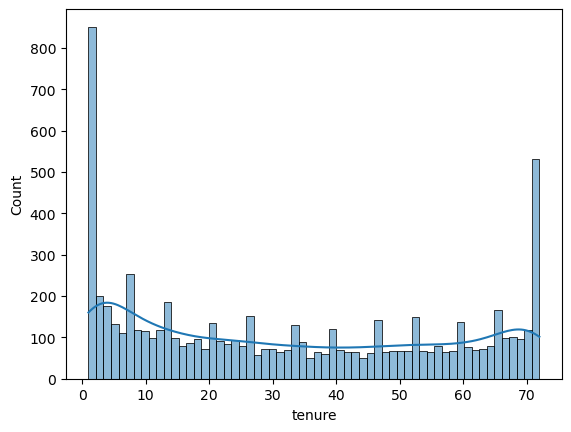

In [19]:
sns.histplot(x=df['tenure'], bins=60, kde=True);
#Most have a very short tenure or are still using the service

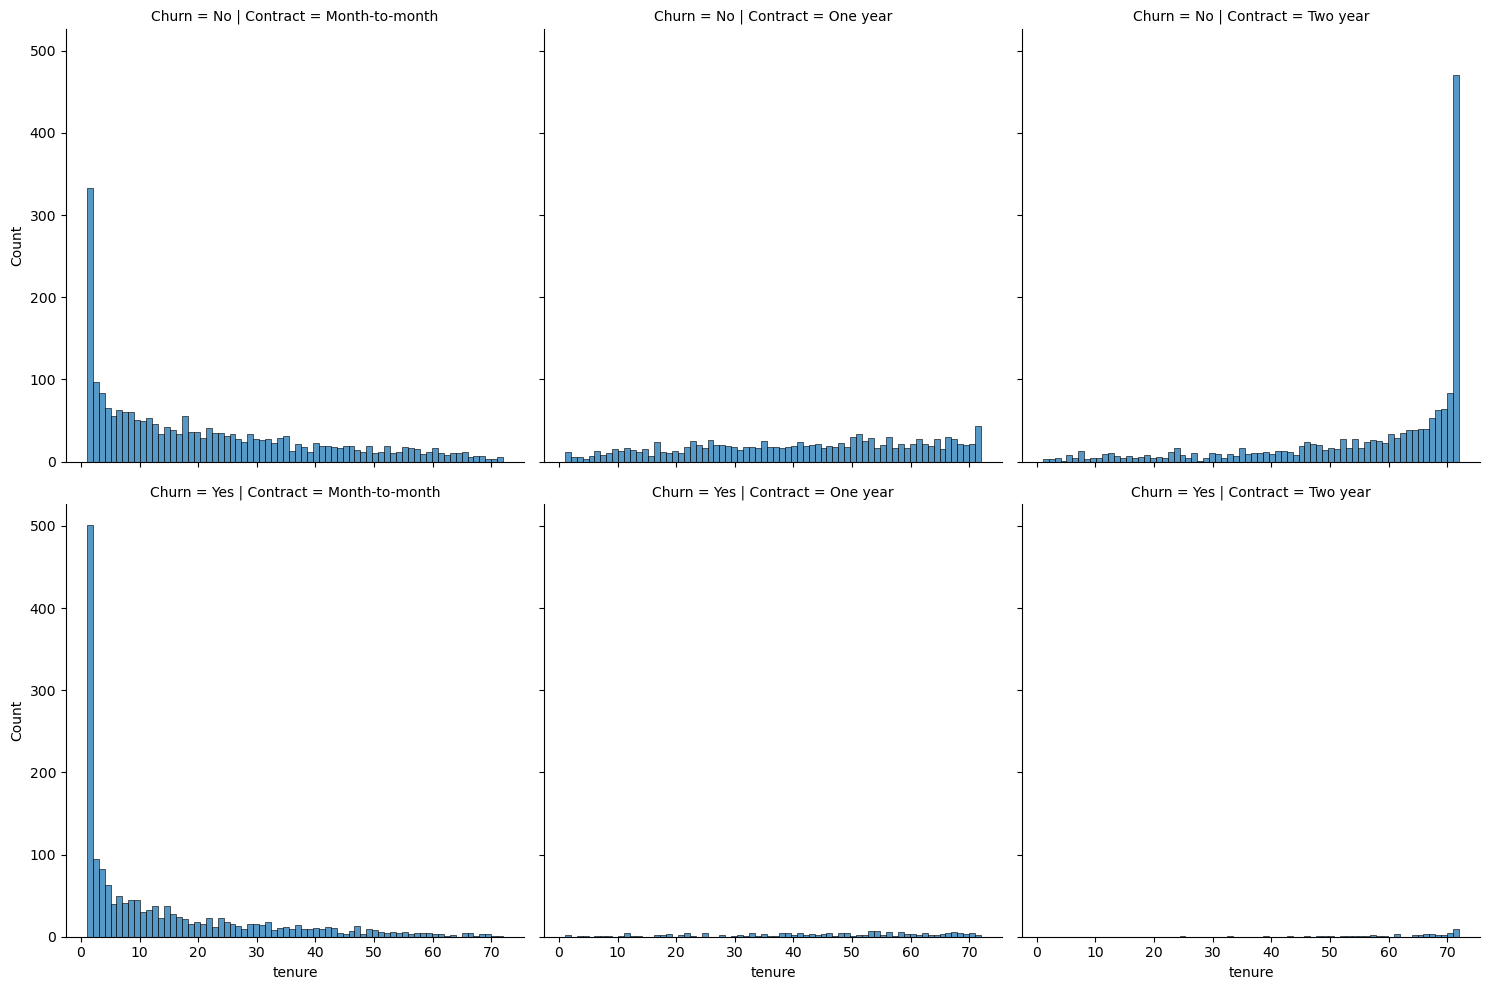

In [20]:
sns.displot(data=df, x='tenure', col='Contract', bins=70, row='Churn');

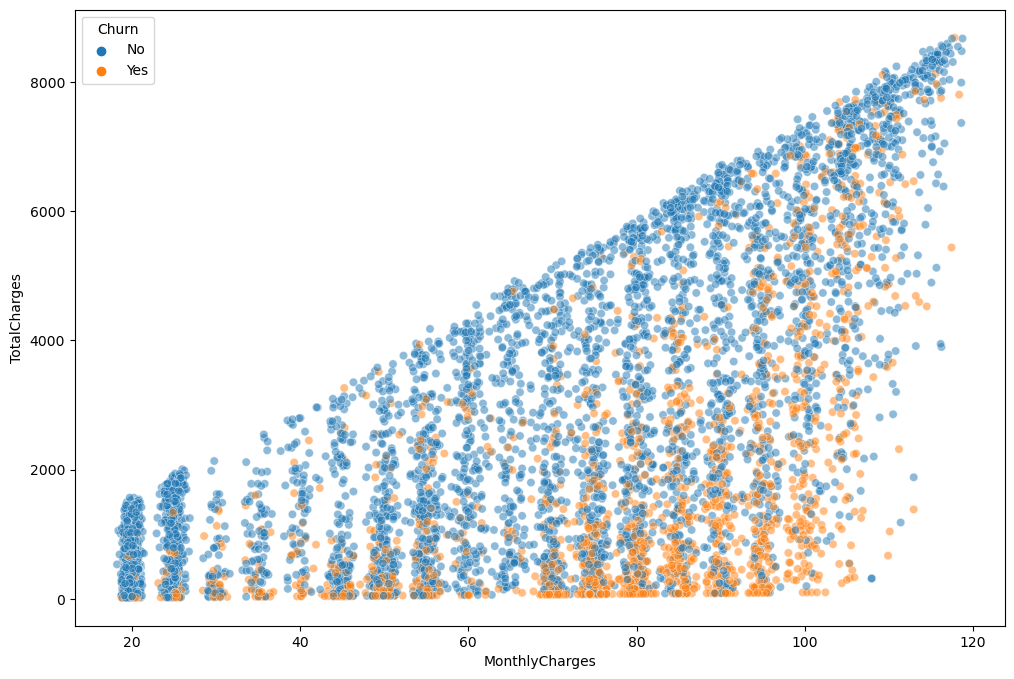

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn',
               alpha=0.5);


Some customers have a much higher monthly charge than
total charge. More of these are churning than customers with both a high
monthly charge and high total charge - this indicates they have more use of
the service.

Creating cohorts based on tenure for better visualization:

In [22]:
df['tenure'] #gives tenure in months

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [23]:
churn_percentage_groupby = df.groupby(by=['tenure'])['Churn'].value_counts(normalize=True).apply(lambda x: x * 100)
#Finds all churn percentages, which we can get by normalizing the values and multiplying by 100

In [24]:
churn_percentage_groupby

tenure  Churn
1       Yes      61.990212
        No       38.009788
2       Yes      51.680672
        No       48.319328
3       No       53.000000
                   ...    
70      Yes       9.243697
71      No       96.470588
        Yes       3.529412
72      No       98.342541
        Yes       1.657459
Name: Churn, Length: 144, dtype: float64

In [25]:
churn_percentage = churn_percentage_groupby.loc[:, 'Yes']

In [26]:
churn_percentage

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64

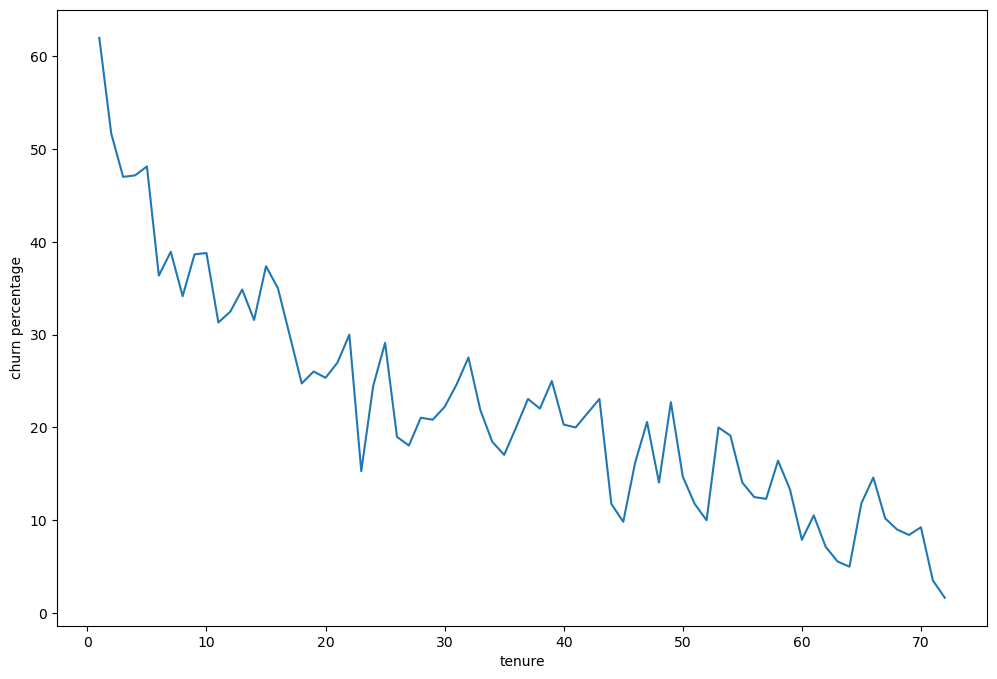

In [27]:
plt.figure(figsize=(12,8))
plt.plot(churn_percentage.index, churn_percentage)
plt.xlabel('tenure')
plt.ylabel('churn percentage');

Creating even broader tenure categories:

In [28]:
def mapping_func(val):
    if val < 13:
        return '0-12 Months'
    elif val < 25:
        return '12-24 Months'
    elif val < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [29]:
df['Tenure Cohort'] = df['tenure'].apply(mapping_func)

In [30]:
df['Tenure Cohort']

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: Tenure Cohort, Length: 7032, dtype: object

Visualizing total charges vs monthly charges for the new cohorts:

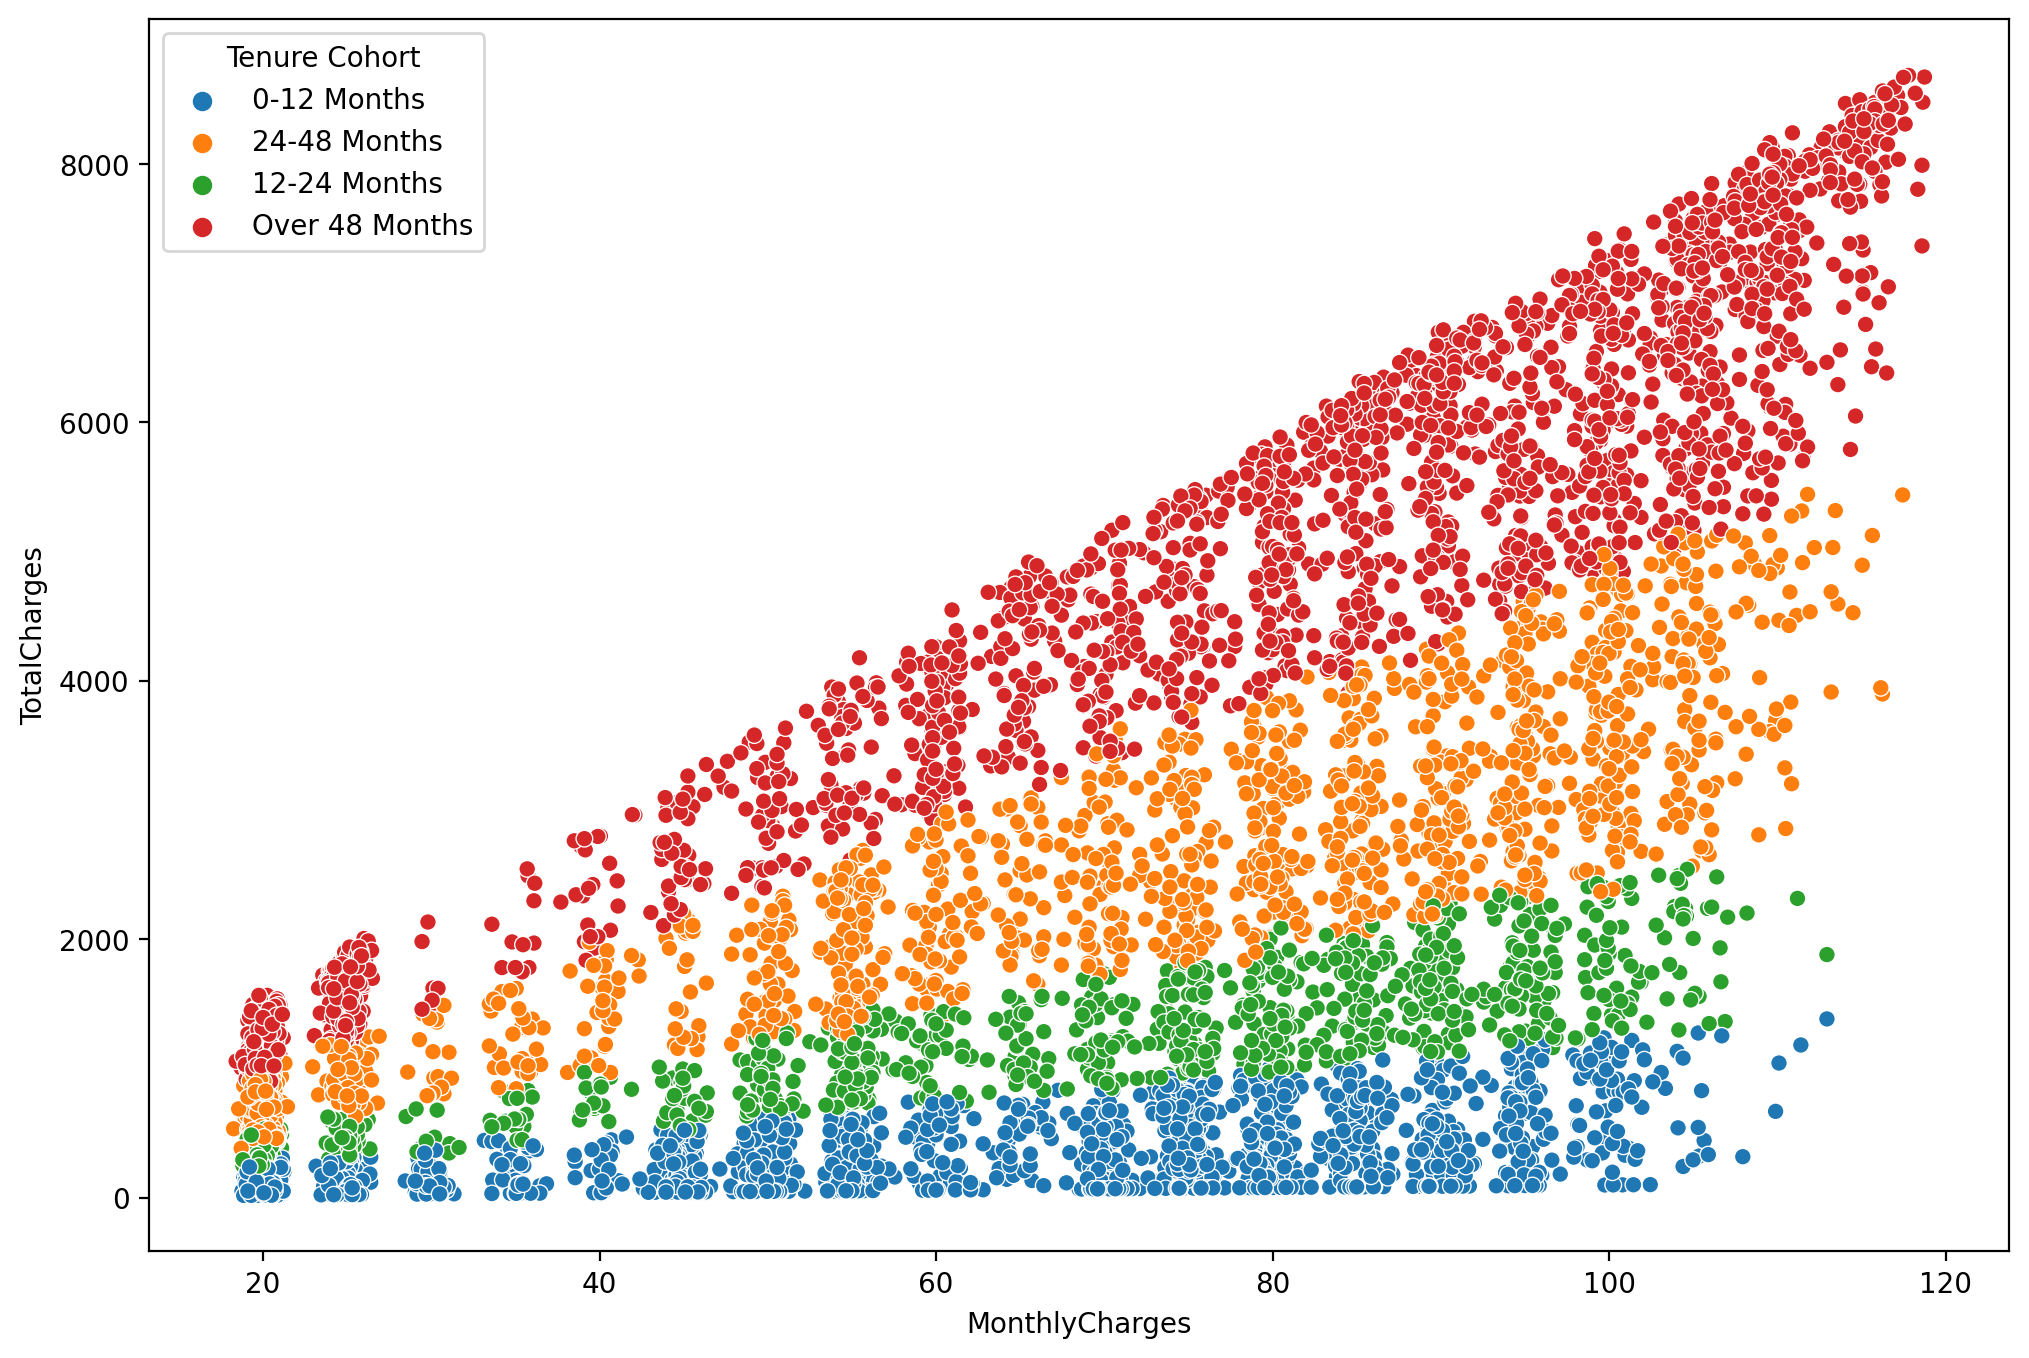

In [31]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort');

Unsurprisingly, the amount of total charges is higher for higher tenure.

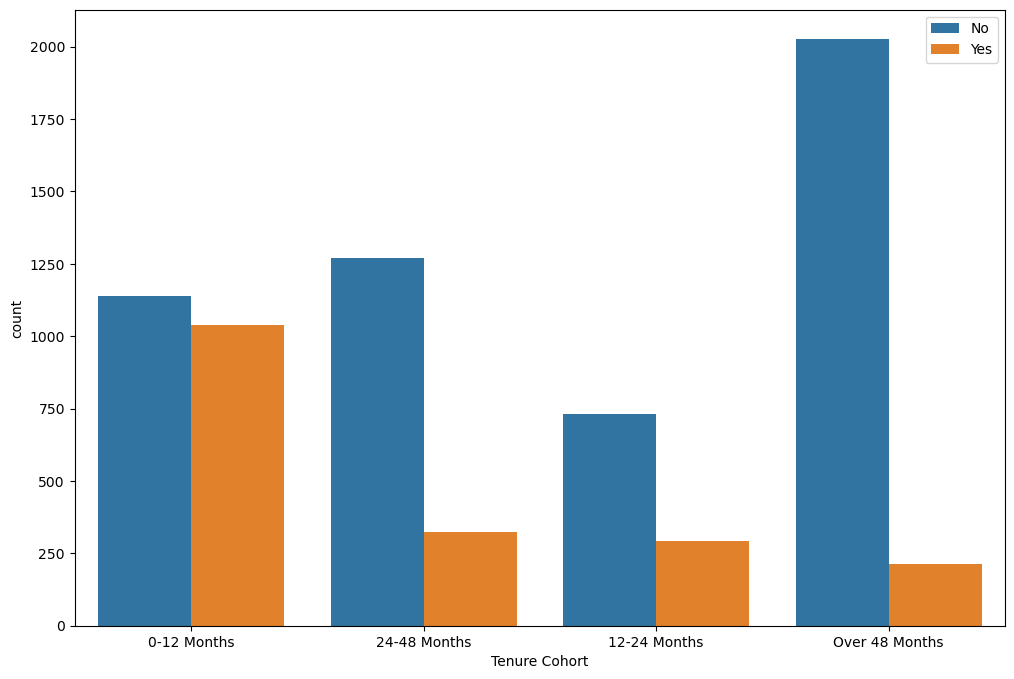

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')
plt.legend(loc=('upper right'));

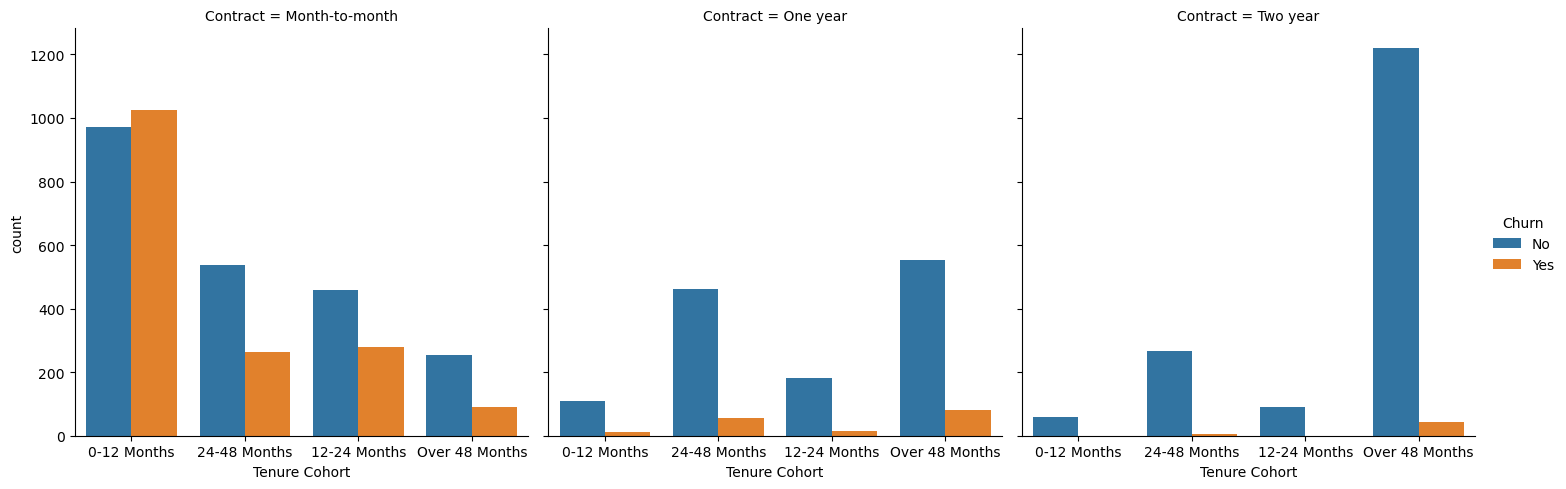

In [33]:
sns.catplot(data=df,x='Tenure Cohort',col='Contract', hue='Churn', 
            kind='count');

## Predictive modeling

Here, a few different tree models will be tested to compare performance. \
First: A single decision tree

In [34]:
X = df.drop(['Churn','customerID'], axis=1) 
#customerID is not valuable to the analysis

X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                   random_state=101)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy','log_loss'],
             'max_depth':[2,3,4,5], 'min_samples_split':[1,2,3],
             'min_samples_leaf':[1,2,3]}

tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, param_grid)

grid.fit(X_train, y_train)

C:\Users\maxba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maxba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxba\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\maxba\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]})

In [39]:
decision_tree_model = grid.best_estimator_

In [40]:
preds = grid.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

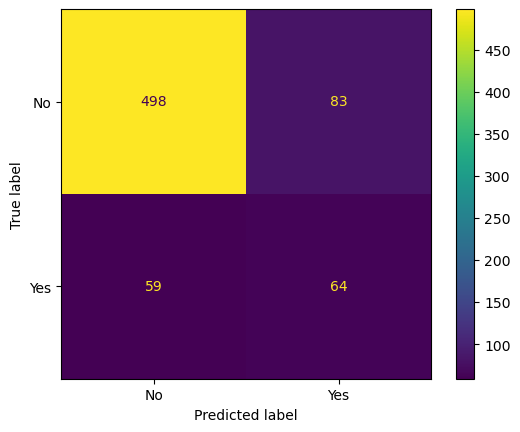

In [42]:
ConfusionMatrixDisplay.from_predictions(preds, y_test);

In [43]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

          No       0.89      0.86      0.88       581
         Yes       0.44      0.52      0.47       123

    accuracy                           0.80       704
   macro avg       0.66      0.69      0.67       704
weighted avg       0.81      0.80      0.81       704



Poor scores - another type of model should be tried. 
Rarely captures churn cases.
Our model is better at predicting no than yes - hence the final accuracy
score being misleading. For our case, it is most important to try and find customers who are going to churn, as we could then take action to keep them on the service.

In [44]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [45]:
important_features = pd.DataFrame(data=decision_tree_model.feature_importances_,
                                 index=X.columns, 
                                  columns=['Feature Importances']).sort_values('Feature Importances')

In [46]:
important_features

,Feature Importances
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000


C:\Users\maxba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


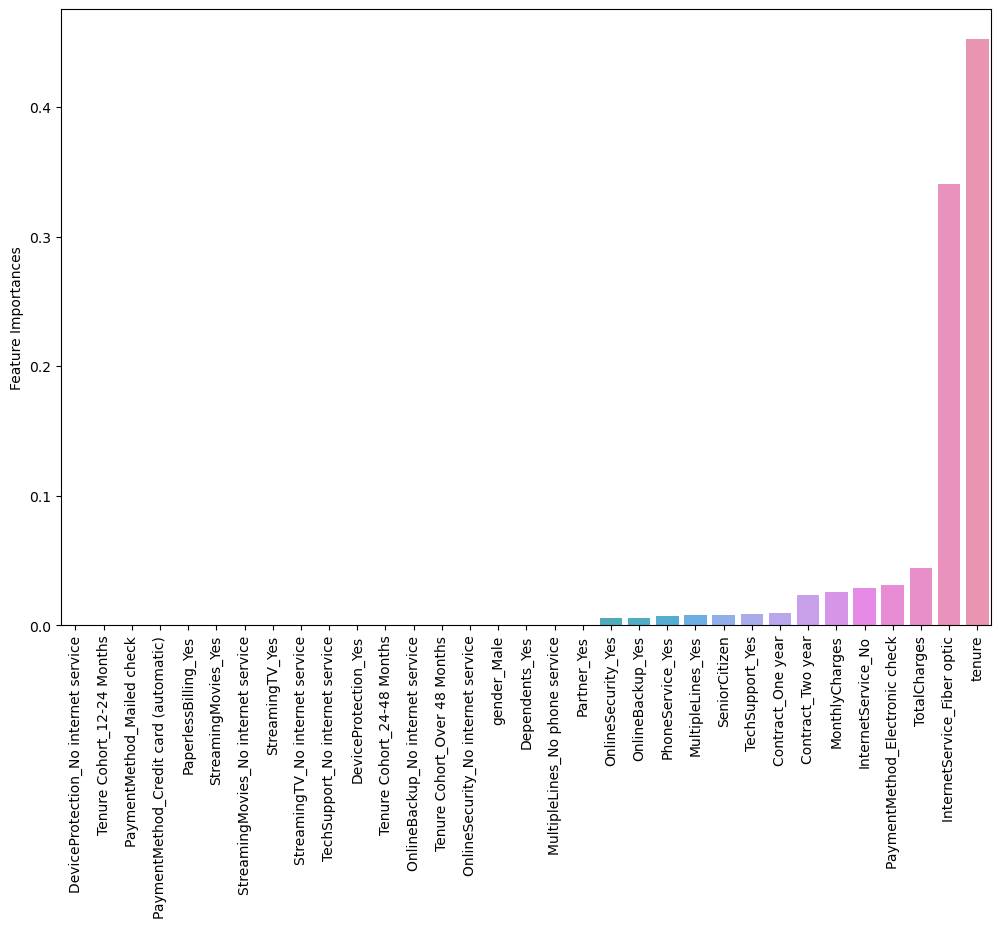

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(important_features.index, 
            important_features['Feature Importances']);
plt.xticks(rotation=90);

Our decision tree didn't use a lot of features - only ~30% of the features were actually found impactful/important for the tree. Surprisingly, fiber optic internet service was found important - this was not clear from the visual and correlation analysis.

Next: Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[5,10,50,100],
             'criterion':['gini', 'entropy','log_loss'],
             'max_depth':[2,4,6,8,None]}

forest_classifier = RandomForestClassifier()
grid_model = GridSearchCV(forest_classifier, param_grid)
grid_model.fit(X_train,y_train)

C:\Users\maxba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maxba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\maxba\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\maxba\anaconda3\lib\site-packages

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, None],
                         'n_estimators': [5, 10, 50, 100]})

In [49]:
grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [50]:
preds = grid_model.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

          No       0.92      0.87      0.89       586
         Yes       0.48      0.60      0.54       118

    accuracy                           0.83       704
   macro avg       0.70      0.74      0.71       704
weighted avg       0.84      0.83      0.83       704



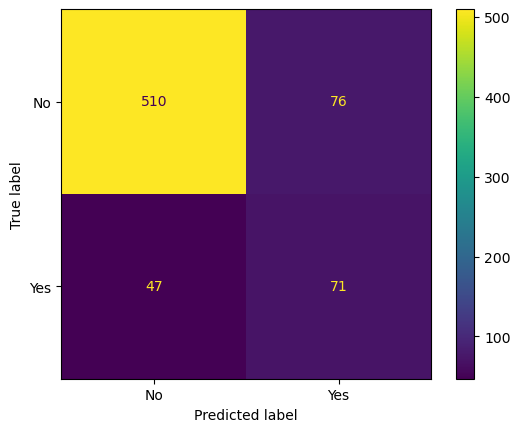

In [51]:
ConfusionMatrixDisplay.from_predictions(preds, y_test);

Better performance than a single decision tree, but still struggles with catching the churn cases. 

Next, boosted trees:

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
ada_model = AdaBoostClassifier()
gradient_model = GradientBoostingClassifier()

ada_model.fit(X_train, y_train)
gradient_model.fit(X_train, y_train)

ada_preds = ada_model.predict(X_test)
gradient_preds = gradient_model.predict(X_test)

print(classification_report(ada_preds, y_test))
print(classification_report(gradient_preds, y_test))

              precision    recall  f1-score   support

          No       0.90      0.88      0.89       571
         Yes       0.54      0.60      0.57       133

    accuracy                           0.83       704
   macro avg       0.72      0.74      0.73       704
weighted avg       0.84      0.83      0.83       704

              precision    recall  f1-score   support

          No       0.90      0.87      0.89       577
         Yes       0.50      0.57      0.53       127

    accuracy                           0.82       704
   macro avg       0.70      0.72      0.71       704
weighted avg       0.83      0.82      0.82       704



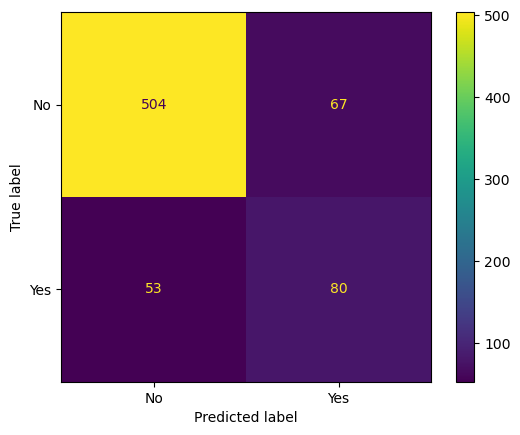

In [57]:
ConfusionMatrixDisplay.from_predictions(ada_preds, y_test);

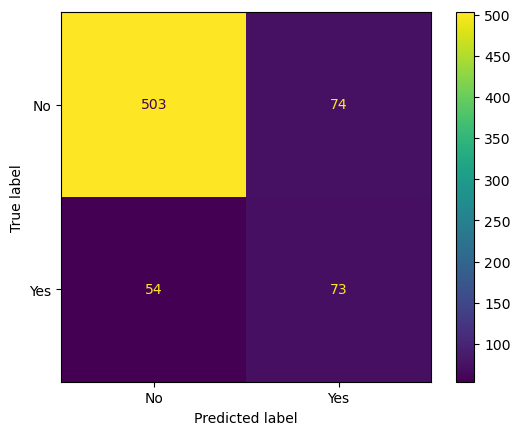

In [58]:
ConfusionMatrixDisplay.from_predictions(gradient_preds, y_test);

Overall, the random forest performed the best of the tree-based methods, but adaboost was very close. Could be worth doing a grid search to find the best adaboost model, to see if it can improve on the random forest model. Kepp in mind that adaboost actually has a low number of hyperparameters, and therefore most likely cannot be improved upon much.

In [64]:
param_grid = {'n_estimators':[30,50,80,100],
             'learning_rate':[0.5,1,2, 3, 5, 10]}

ada_model = AdaBoostClassifier()
grid = GridSearchCV(ada_model, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 2, 3, 5, 10],
                         'n_estimators': [30, 50, 80, 100]})

In [62]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=30)

In [63]:
preds = grid.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

          No       0.91      0.88      0.89       579
         Yes       0.52      0.61      0.56       125

    accuracy                           0.83       704
   macro avg       0.71      0.74      0.73       704
weighted avg       0.84      0.83      0.83       704



Didn't end up making much of a difference, but worth a try.

## Trying SVC as well:

In [55]:
from sklearn.svm import SVC

In [56]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [94]:
#During the training process, I encountered some issues when trying different metrics with the "No" and "Yes" labels
mapping_dict = {'No':0, 'Yes':1}
y_train = y_train.map(mapping_dict)
y_test = y_train.map(mapping_dict)

The SVC will usually not perform well unless data is scaled:

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [117]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [118]:
#Warning: This is a big grid search, and could take some minutes to run depending on hardware.
svc = SVC()
svc_grid = {'C':[0.5,1,3,5,50,100],
           'kernel':['poly','rbf', 'sigmoid'],
           'degree':[2,3,4]}
                     
grid_model = GridSearchCV(svc, svc_grid, verbose=2, scoring='f1')
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END .......................C=0.5, degree=2, kernel=poly; total time=   0.5s
[CV] END .......................C=0.5, degree=2, kernel=poly; total time=   0.5s
[CV] END .......................C=0.5, degree=2, kernel=poly; total time=   0.6s
[CV] END .......................C=0.5, degree=2, kernel=poly; total time=   0.5s
[CV] END .......................C=0.5, degree=2, kernel=poly; total time=   0.6s
[CV] END ........................C=0.5, degree=2, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.5, degree=2, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.5, degree=2, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.5, degree=2, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.5, degree=2, kernel=rbf; total time=   0.9s
[CV] END ....................C=0.5, degree=2, kernel=sigmoid; total time=   0.8s
[CV] END ....................C=0.5, degree=2, k

[CV] END ......................C=3, degree=2, kernel=sigmoid; total time=   0.5s
[CV] END ......................C=3, degree=2, kernel=sigmoid; total time=   0.5s
[CV] END ......................C=3, degree=2, kernel=sigmoid; total time=   0.7s
[CV] END ......................C=3, degree=2, kernel=sigmoid; total time=   0.7s
[CV] END .........................C=3, degree=3, kernel=poly; total time=   0.6s
[CV] END .........................C=3, degree=3, kernel=poly; total time=   0.8s
[CV] END .........................C=3, degree=3, kernel=poly; total time=   0.7s
[CV] END .........................C=3, degree=3, kernel=poly; total time=   0.7s
[CV] END .........................C=3, degree=3, kernel=poly; total time=   0.6s
[CV] END ..........................C=3, degree=3, kernel=rbf; total time=   0.9s
[CV] END ..........................C=3, degree=3, kernel=rbf; total time=   0.9s
[CV] END ..........................C=3, degree=3, kernel=rbf; total time=   1.0s
[CV] END ...................

[CV] END .........................C=50, degree=3, kernel=rbf; total time=   1.5s
[CV] END .........................C=50, degree=3, kernel=rbf; total time=   1.5s
[CV] END .....................C=50, degree=3, kernel=sigmoid; total time=   0.4s
[CV] END .....................C=50, degree=3, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=50, degree=3, kernel=sigmoid; total time=   0.4s
[CV] END .....................C=50, degree=3, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=50, degree=3, kernel=sigmoid; total time=   0.5s
[CV] END ........................C=50, degree=4, kernel=poly; total time=   1.1s
[CV] END ........................C=50, degree=4, kernel=poly; total time=   1.0s
[CV] END ........................C=50, degree=4, kernel=poly; total time=   1.2s
[CV] END ........................C=50, degree=4, kernel=poly; total time=   1.1s
[CV] END ........................C=50, degree=4, kernel=poly; total time=   1.1s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1, 3, 5, 50, 100], 'degree': [2, 3, 4],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=2)

In [119]:
grid_model.best_estimator_

SVC(C=100, degree=2, kernel='poly')

In [124]:
preds = grid_model.predict(scaled_X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       586
           1       0.46      0.58      0.51       118

    accuracy                           0.82       704
   macro avg       0.69      0.72      0.70       704
weighted avg       0.84      0.82      0.82       704



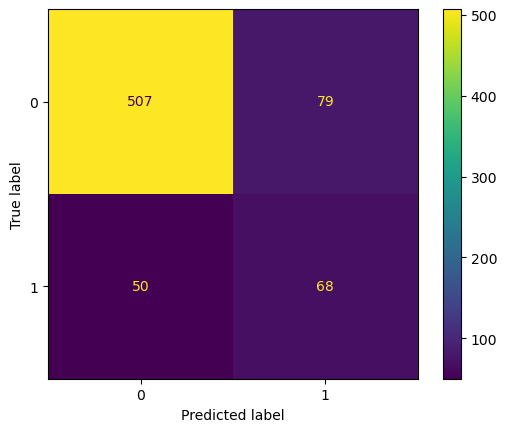

In [126]:
ConfusionMatrixDisplay.from_predictions(preds, y_test);

SVM performed similarly to the other models, a little worse than the forest methods.

## Conclusion

Although the random forest model performed best, none of the models that were tried managed to capture/recall the churn cases very well, usually 50-60% recall. 

However, the model can still be useful in giving an indication for some of the customers of if they are going to churn, and the correlation analysis gives some grounds to know which customer types should be targeted with measures to reduce churn likelihood (i.e. potentially make the service more attractive for these customers).